In [747]:
import numpy as np
from matplotlib.pylab import *
import pandas as pd

In [748]:
data = pd.read_csv('Data Science Evaluation.csv')

In [749]:
data.head()

Region        Country        Item Type  \
0                 Sub-Saharan Africa  Cote d'Ivoire           Snacks   
1                 Sub-Saharan Africa       Ethiopia           Snacks   
2  Central America and the Caribbean         Panama          Clothes   
3                             Europe         Sweden  Office Supplies   
4                             Europe        Romania        Cosmetics   

   Fiscal Year Sales Channel Order Priority Order Date   Order ID Ship Date  \
0         2010        Online              C    4/23/10  241891753   4/26/10   
1         2010        Online              H     6/6/10  530075585    7/1/10   
2         2011       Offline              H     1/2/11  293357980   1/22/11   
3         2012        Online              L    10/2/12  360841929  10/20/12   
4         2016        Online              M    3/16/16  707318103    5/3/16   

   Units Sold  Unit Price  Unit Cost  Total Revenue  Total Cost  Total Profit  \
0       10000      152.58      97.44      1525800.0    974400.0      551400.0   
1       10000      152.58      97.44      1525800.0    974400.0      551400.0   
2       10000      109.28      35.84      1092800.0    358400.0      734400.0   
3       10000      651.21     524.96      6512100.0   5249600.0     1262500.0   
4       10000      437.20     263.33      4372000.0   2633300.0     1738700.0   

   Profit as % of Cost  
0             0.565887  
1             0.565887  
2             2.049107  
3             0.240495  
4             0.660274

In [750]:
data.describe(include='all')

Region Country  Item Type   Fiscal Year Sales Channel Order Priority  \
count    65535   65535      65535  65535.000000         65535          65535   
unique       7     185         12           NaN             2              4   
top     Europe   Ghana  Baby Food           NaN       Offline              C   
freq     17260     408       5510           NaN         32954          16553   
mean       NaN     NaN        NaN   2013.309560           NaN            NaN   
std        NaN     NaN        NaN      2.199086           NaN            NaN   
min        NaN     NaN        NaN   2010.000000           NaN            NaN   
25%        NaN     NaN        NaN   2011.000000           NaN            NaN   
50%        NaN     NaN        NaN   2013.000000           NaN            NaN   
75%        NaN     NaN        NaN   2015.000000           NaN            NaN   
max        NaN     NaN        NaN   2017.000000           NaN            NaN   

       Order Date      Order ID Ship Date    Units Sold    Unit Price  \
count       65535  6.553500e+04     65535  65535.000000  65535.000000   
unique       2766           NaN      2813           NaN           NaN   
top       2/22/13           NaN  12/27/16           NaN           NaN   
freq           43           NaN        43           NaN           NaN   
mean          NaN  5.529922e+08       NaN   4987.064500    266.192472   
std           NaN  2.605409e+08       NaN   2890.993357    216.999838   
min           NaN  1.000149e+08       NaN      1.000000      9.330000   
25%           NaN  3.267064e+08       NaN   2470.000000     81.730000   
50%           NaN  5.521281e+08       NaN   4983.000000    205.700000   
75%           NaN  7.786878e+08       NaN   7500.000000    437.200000   
max           NaN  9.999939e+08       NaN  10000.000000    668.270000   

           Unit Cost  Total Revenue    Total Cost  Total Profit  \
count   65535.000000   6.553500e+04  6.553500e+04  6.553500e+04   
unique           NaN            NaN           NaN           NaN   
top              NaN            NaN           NaN           NaN   
freq             NaN            NaN           NaN           NaN   
mean      187.606190   1.326827e+06  9.350665e+05  3.917610e+05   
std       175.613364   1.466334e+06  1.146901e+06  3.784097e+05   
min         6.920000   3.732000e+01  2.768000e+01  9.640000e+00   
25%        56.670000   2.764137e+05  1.626588e+05  9.566828e+04   
50%       117.110000   7.873129e+05  4.659253e+05  2.809080e+05   
75%       263.330000   1.810119e+06  1.197962e+06  5.632895e+05   
max       524.960000   6.682032e+06  5.249600e+06  1.738700e+06   

        Profit as % of Cost  
count          65535.000000  
unique                  NaN  
top                     NaN  
freq                    NaN  
mean               0.610672  
std                0.466814  
min                0.156846  
25%                0.348266  
50%                0.565887  
75%                0.660274  
max                2.049107

In [751]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Region               65535 non-null  object 
 1   Country              65535 non-null  object 
 2   Item Type            65535 non-null  object 
 3   Fiscal Year          65535 non-null  int64  
 4   Sales Channel        65535 non-null  object 
 5   Order Priority       65535 non-null  object 
 6   Order Date           65535 non-null  object 
 7   Order ID             65535 non-null  int64  
 8   Ship Date            65535 non-null  object 
 9   Units Sold           65535 non-null  int64  
 10  Unit Price           65535 non-null  float64
 11  Unit Cost            65535 non-null  float64
 12  Total Revenue        65535 non-null  float64
 13  Total Cost           65535 non-null  float64
 14  Total Profit         65535 non-null  float64
 15  Profit as % of Cost  65535 non-null 

In [752]:
data.duplicated().sum() # check for duplicates

0

In [753]:
data.isnull().sum() # check to see if there's any missing anywhere

Region                 0
Country                0
Item Type              0
Fiscal Year            0
Sales Channel          0
Order Priority         0
Order Date             0
Order ID               0
Ship Date              0
Units Sold             0
Unit Price             0
Unit Cost              0
Total Revenue          0
Total Cost             0
Total Profit           0
Profit as % of Cost    0
dtype: int64

In [754]:
rcParams.update({'font.size': 20})

## 1) Which products are the most profitable? 

In [755]:
fiscal_data = data.groupby(['Fiscal Year', 'Item Type']).agg({'Total Profit': ['sum', 'mean', 'min', 'max']})
fiscal_data.columns = ['profit_total', 'profit_mean', 'profit_min', 'profit_max']
fiscal_data = fiscal_data.reset_index()
fiscal_data.head()

Fiscal Year  Item Type  profit_total    profit_mean  profit_min  profit_max
0         2010  Baby Food  3.387792e+08  465356.056923      287.58   957928.98
1         2010  Beverages  5.503516e+07   76757.544603       46.98   156380.76
2         2010     Cereal  3.035696e+08  439955.914783      797.31   885191.28
3         2010    Clothes  2.631846e+08  379228.498444     1982.88   734179.68
4         2010  Cosmetics  6.503084e+08  859059.973752     3477.40  1738004.52

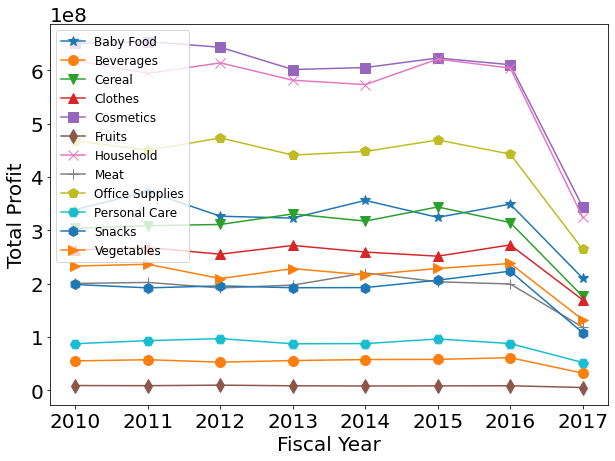

In [756]:
label = ['*', 'o','v','^','s','d', 'x', '+', 'p', 'H','h','>','<','_']
figure(figsize=(10,7))
i = 0
for item in fiscal_data['Item Type'].unique():
    idx = fiscal_data['Item Type'] == item
    plot(fiscal_data['Fiscal Year'][idx], fiscal_data['profit_total'][idx], '-' + label[i], label = item, markersize=10)
    i+=1
legend(fontsize = 12, loc = 'upper left')
# yscale('log')
xlabel('Fiscal Year')
ylabel('Total Profit')
show()

There is no clear trend in total profit over the years except a drop in 2017 for all products. Cosmetics and household remain the most profitable categories. Fruits, beverages and personal care are the least profitable category. 

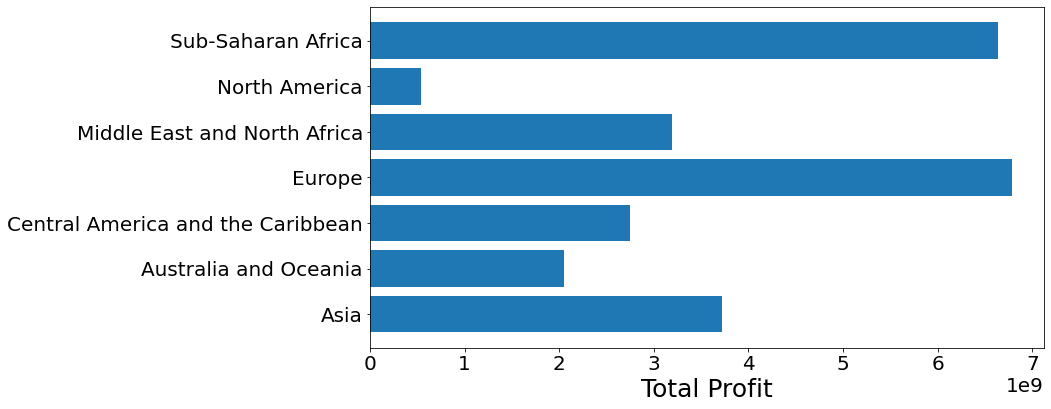

In [757]:
figure(figsize=(15,6))
barh(region_data['Region'].unique(), data.groupby(['Region'])['Total Profit'].sum())
tight_layout()
xlabel('Total Profit', fontsize=25)
# xticks(fontsize=20)
# yticks(fontsize=20)
# xscale('log')
show()

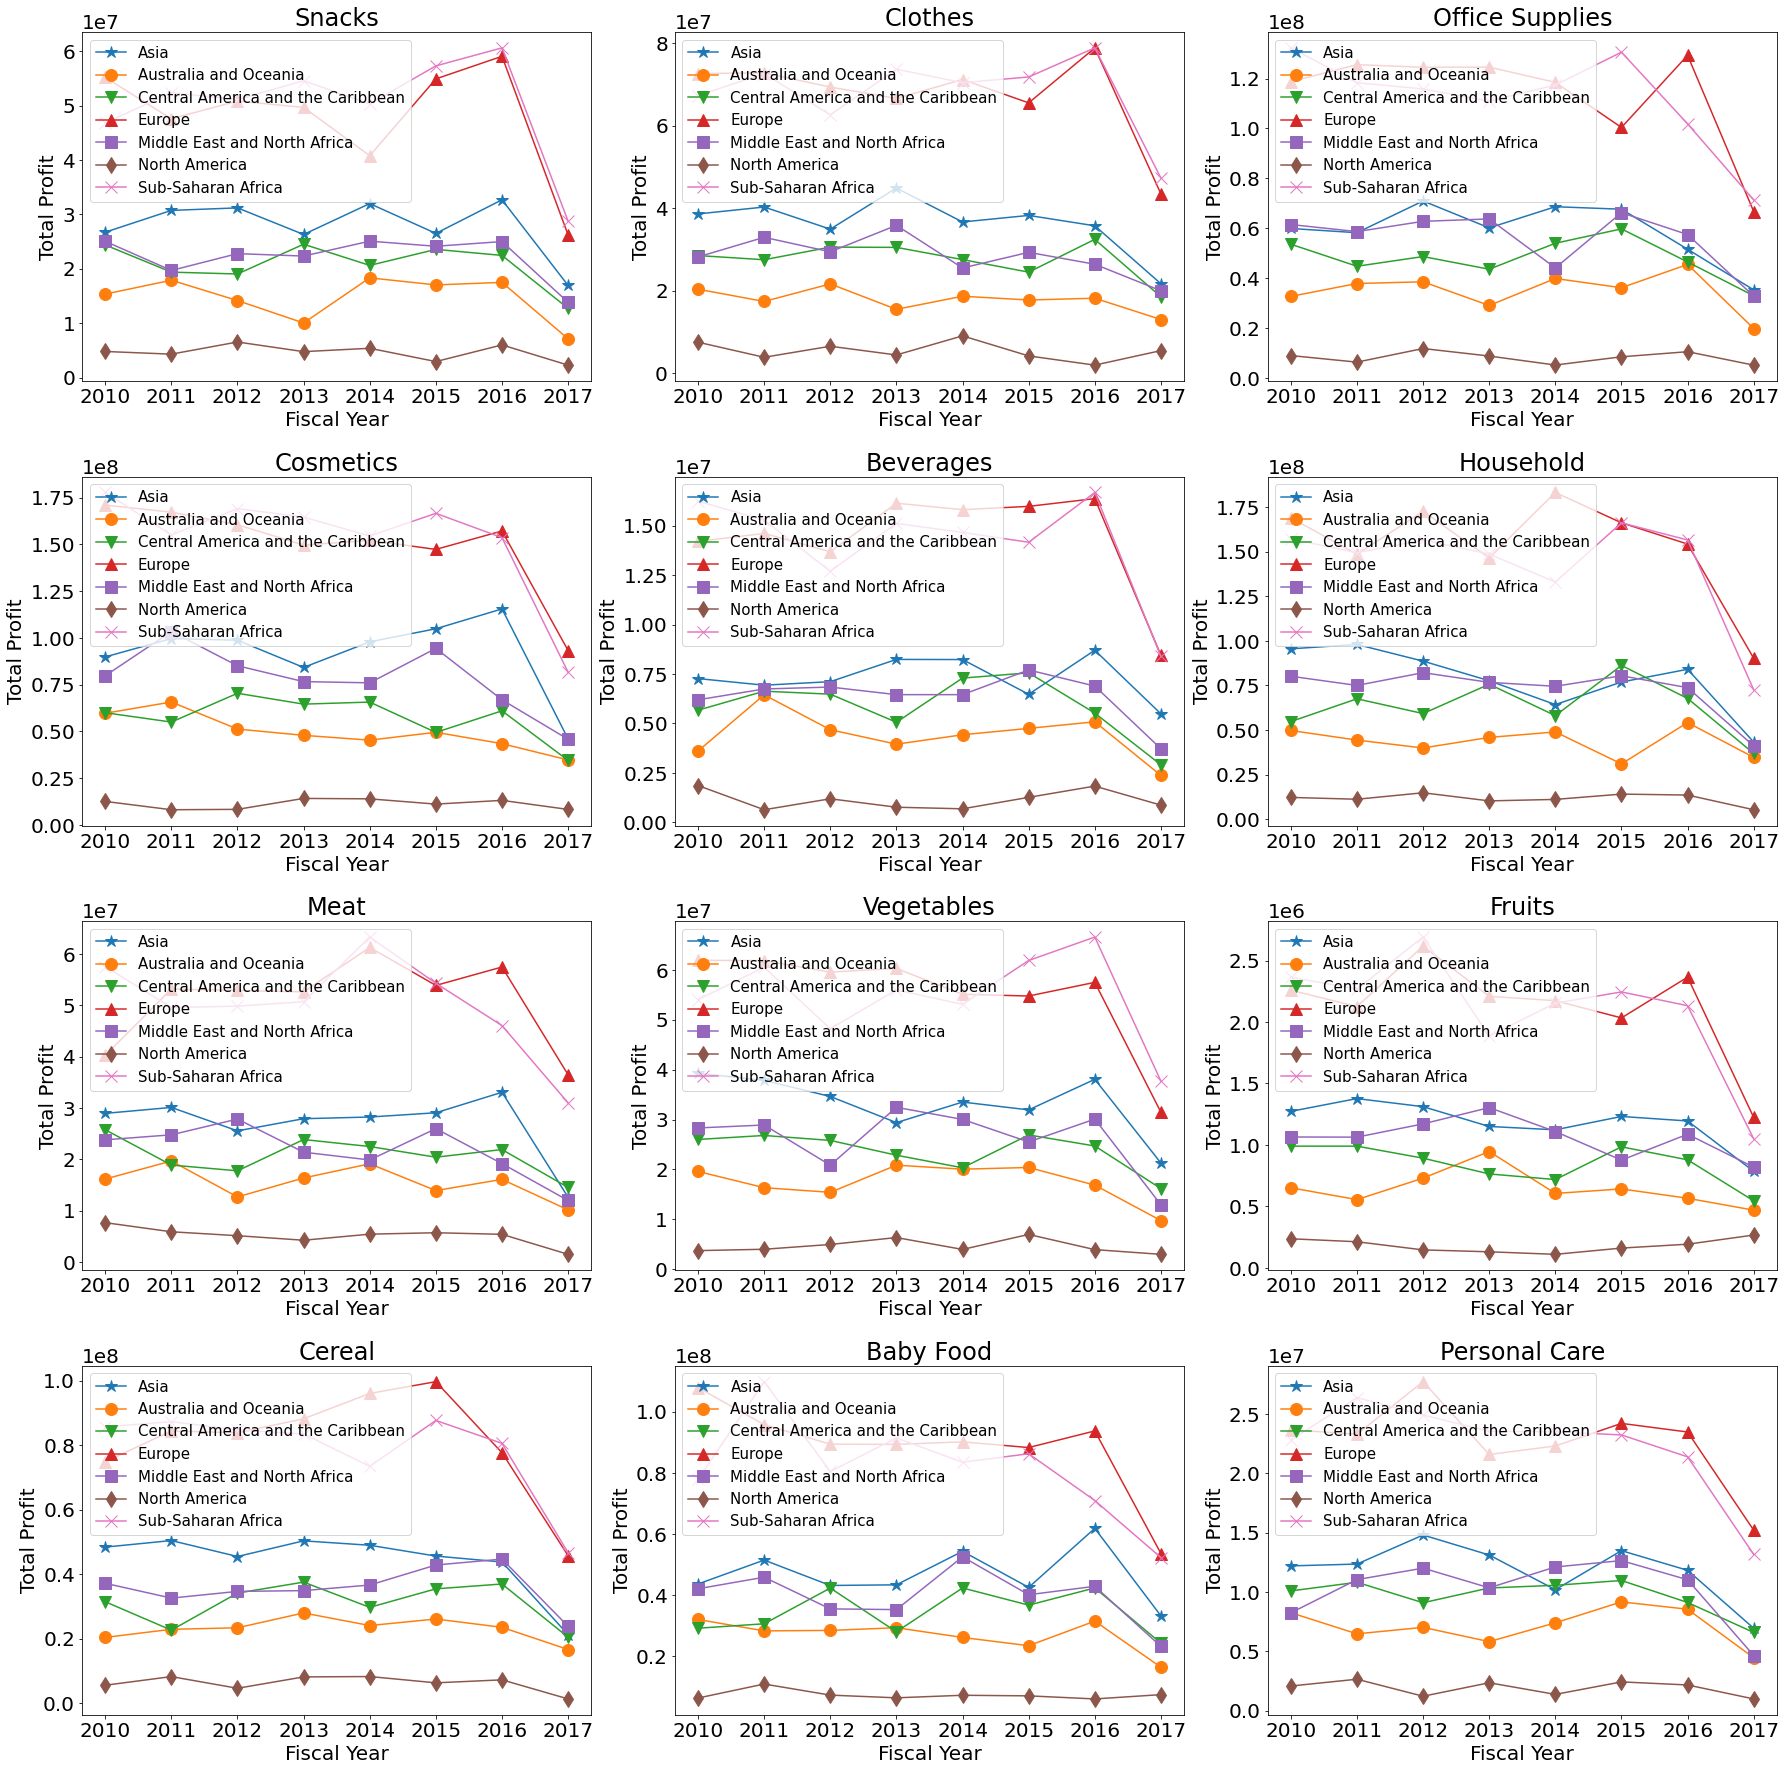

In [758]:
figure(figsize=(25,25))
# figure(figsize=(5,30))

k = 0
for item in data['Item Type'].unique():
    subplot(4,3,k+1)
    sub_data = data[data['Item Type'] == item]
    reg_data = sub_data.groupby(['Fiscal Year', 'Region']).agg({'Total Profit': ['sum', 'mean', 'min', 'max']})
    reg_data.columns = ['profit_total', 'profit_mean', 'profit_min', 'profit_max']
    reg_data = reg_data.reset_index()
    reg_data.head()
#     figure(figsize=(10,7))
    i = 0
    for region in reg_data['Region'].unique():
        idx = reg_data['Region'] == region
        plot(reg_data['Fiscal Year'][idx], reg_data['profit_total'][idx], '-' + label[i], label = region, markersize=12)
        i+=1
#     if k == 0:
        legend(fontsize = 15, loc = 'upper left')
#     yscale('log')
    xlabel('Fiscal Year')
    ylabel('Total Profit')
    title(item)
    k+=1
tight_layout()
show()

    

It seems like the profit of each product in different regions is proportional with the overall profit of the region. The North American is the least profitable.  

## 2) Which products are the easiest to sell? 

In [794]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])
data['days_diff'] = (data['Ship Date'] - data['Order Date']) / np.timedelta64(1, "D")

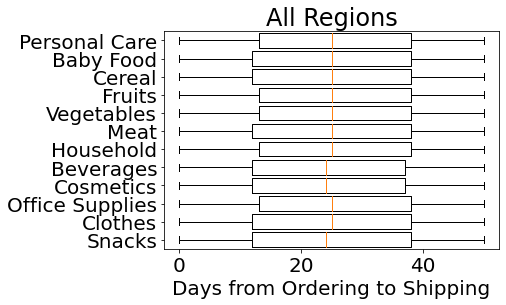

In [760]:
i = 0
for item in items:
    boxplot(data[data['Item Type']== item]['days_diff'], positions = [i], widths =0.8, vert = False)
    i += 1
yticks(np.arange(len(items)), items)
xlabel('Days from Ordering to Shipping')
title('All Regions')
show()

Snacks, cosmetics and beverages take the least amount of time to ship, but the different in days between ordering and shipping is small across all products. 

In [761]:
dic_mean = {}
dic_median = {}
for region in data['Region'].unique():
    idx = data['Region'] == region
    k = 0
    mean_item = []
    median_item = []
    for item in data['Item Type'].unique():
        day_mean = data[data['Item Type'] == item]['days_diff'][idx].mean()
        day_median = data[data['Item Type'] == item]['days_diff'][idx].median()
        mean_item.append(day_mean)
        median_item.append(day_median)
    dic_mean[region] = mean_item
    dic_median[region] = median_item

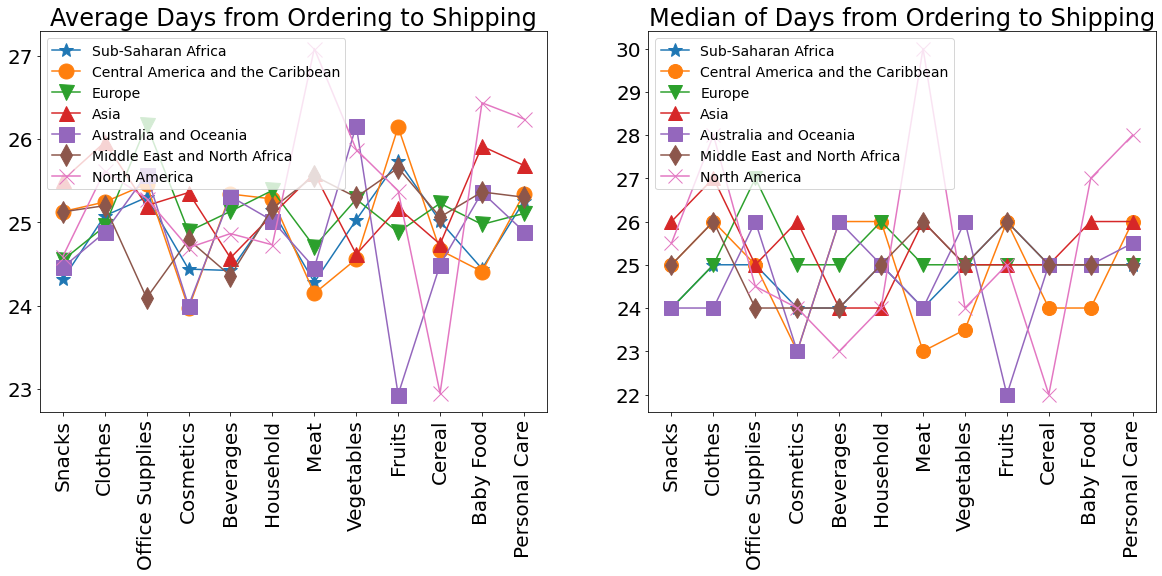

In [762]:
items = data['Item Type'].unique()
figure(figsize=(20,7))
k = 0
subplot(1,2,1)
for region in list(dic.keys()):
    plot(dic_mean[region], '-' + label[k], label = region, markersize=15)
    k += 1
xticks(np.arange(len(items)), items, rotation =90)
legend(fontsize=14, loc = 'upper left')
title('Average Days from Ordering to Shipping')

# figure(figsize=(10,7))
k = 0
subplot(1,2,2)
for region in list(dic.keys()):
    plot(dic_median[region], '-' + label[k], label = region, markersize=14)
    k += 1
xticks(np.arange(len(items)), items, rotation =90)
legend(fontsize=14, loc = 'upper left')
title('Median of Days from Ordering to Shipping')
# tight_layout()
show()
    

The plot on the left is the average number of days from ordering to shipping for each product category in different regions. On average meat in North America takes the longest to ship. Fruits in Australia and cereal in North America takes the least amount of days to ship on average. 

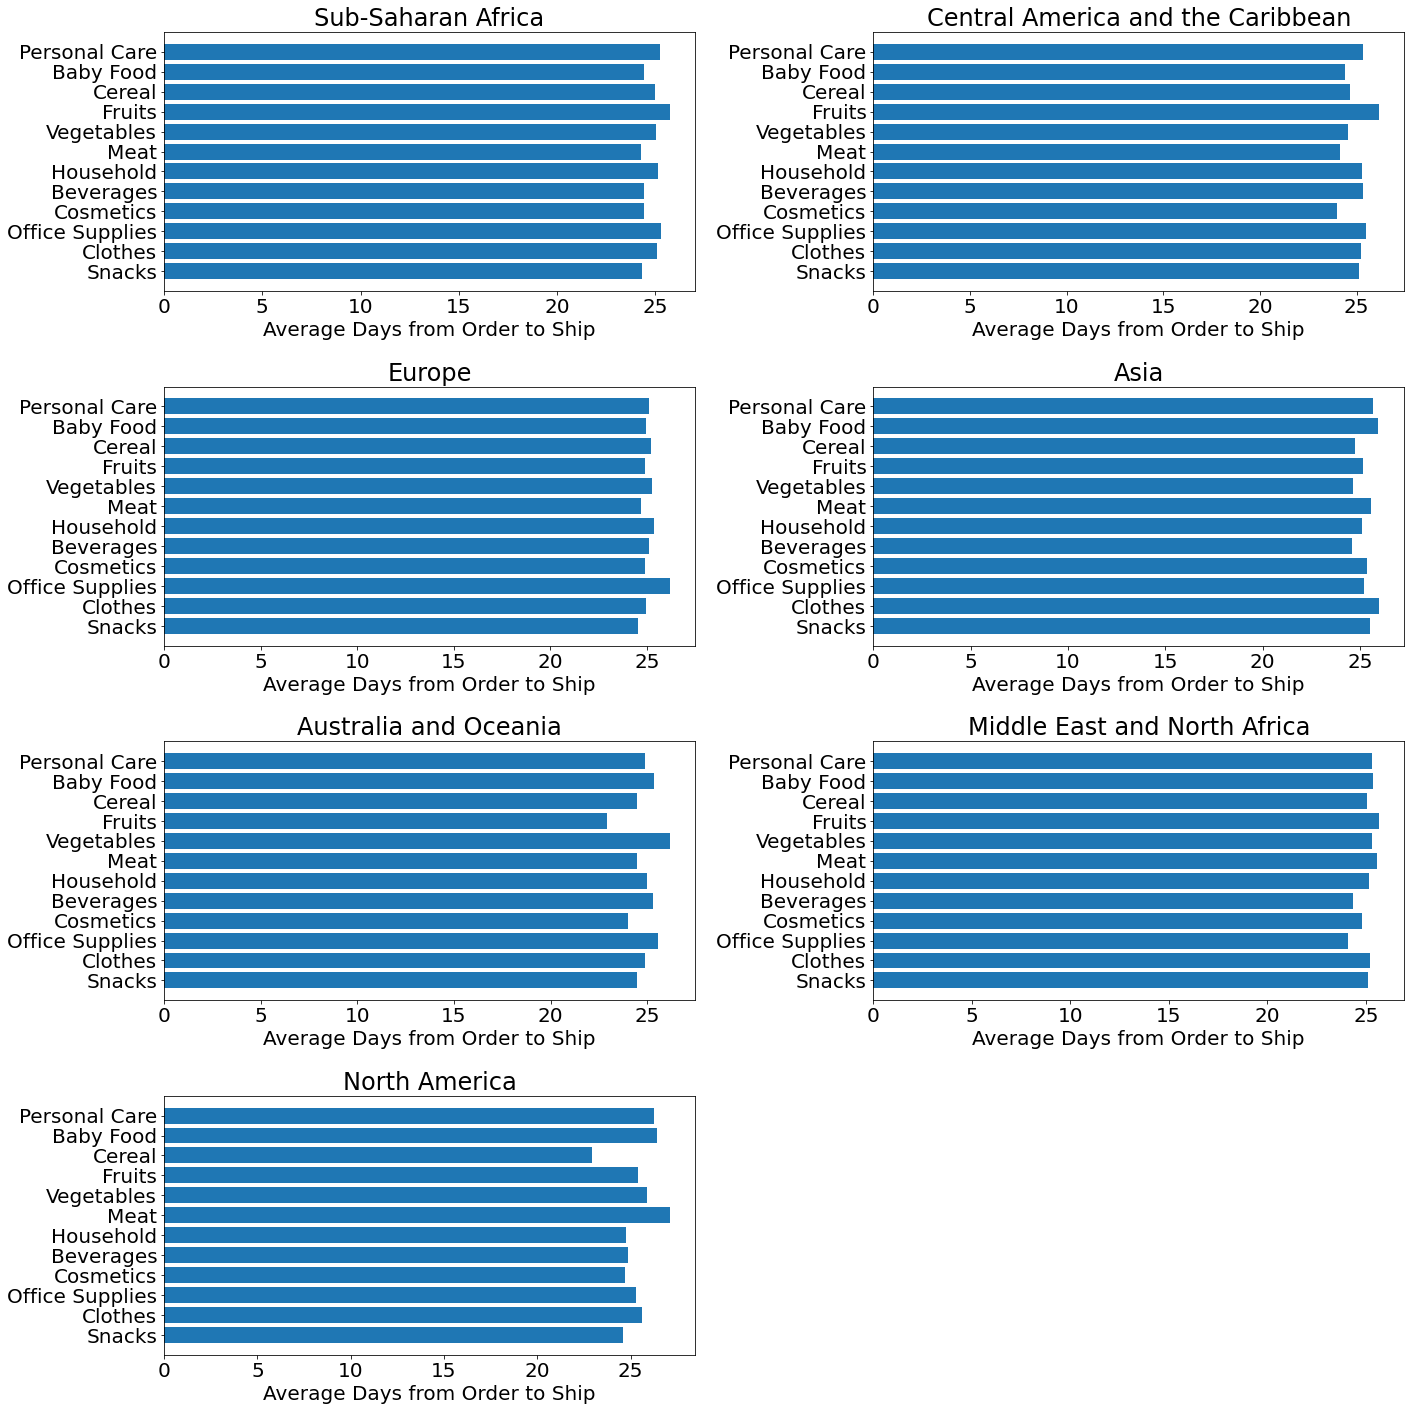

In [763]:
figure(figsize=(20,20))
k = 0
for region in list(dic.keys()):
    subplot(4,2,k+1)
    barh(items, dic_mean[region])
    xlabel('Average Days from Order to Ship')
    title(region)
    k += 1
tight_layout()
show()

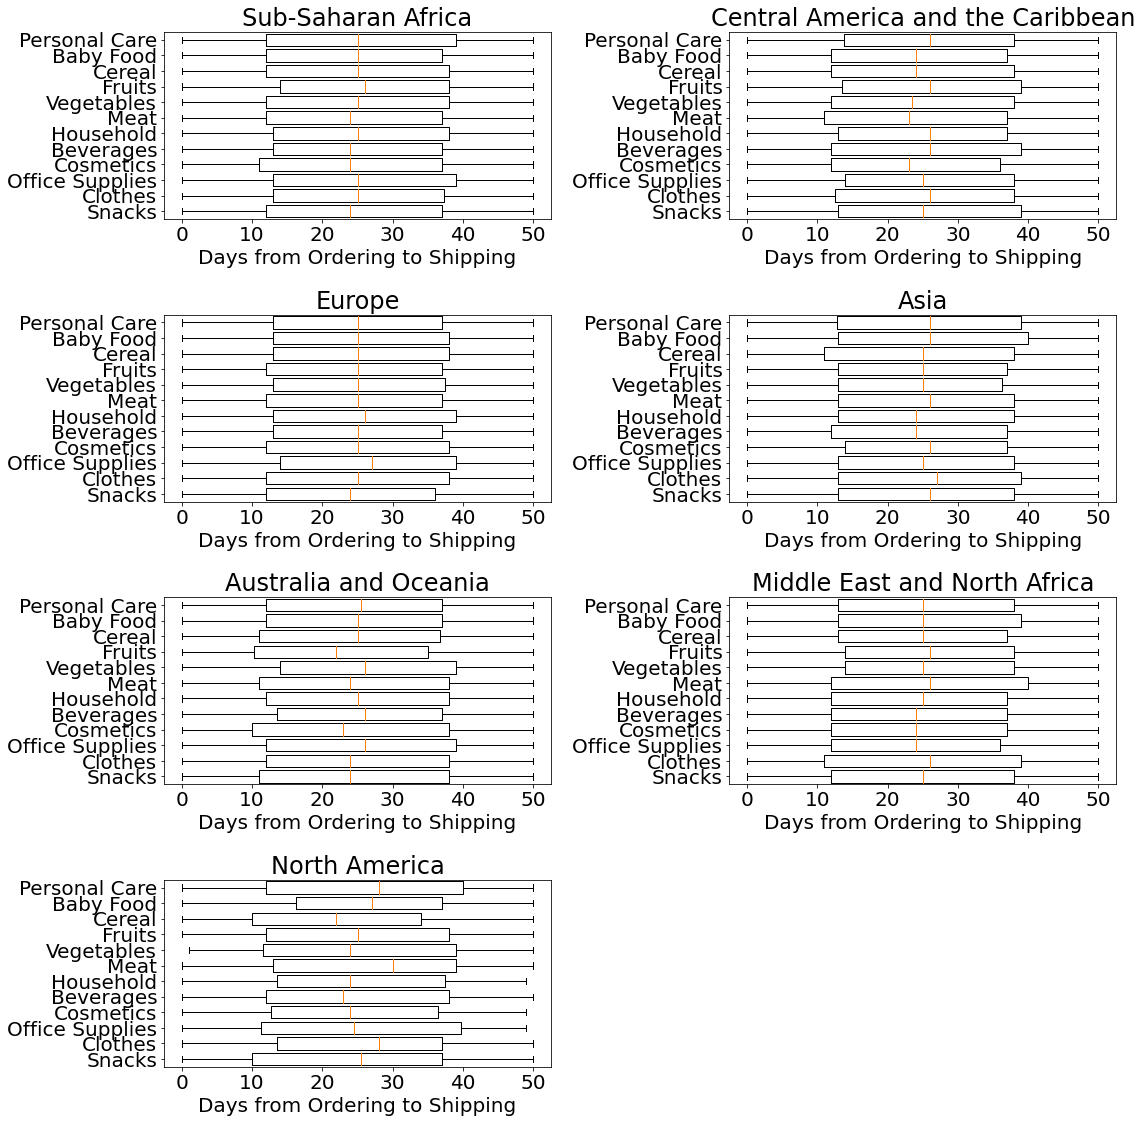

In [764]:
figure(figsize=(16,16))
k = 0
for region in data['Region'].unique():
#     figure(figsize=(7,5))
    subplot(4,2, k +1)
    idx = data['Region'] == region
    mean_item = []
    total_item = []
    i = 0
    for item in data['Item Type'].unique():
        boxplot(data[data['Item Type'] == item]['days_diff'][idx], positions = [i], widths =0.8, vert = False)
        day_total = data[data['Item Type'] == item]['days_diff'][idx].sum()
        i += 1
    yticks(np.arange(len(items)), items)
    xlabel('Days from Ordering to Shipping')
    k += 1
    title(region)
tight_layout()
show()


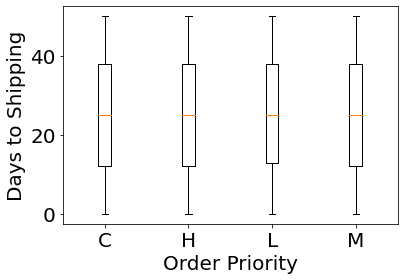

Executing shutdown due to inactivity...


2021-05-23 16:23:28,547 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2021-05-23 16:23:28,578 - INFO     - Executing shutdown...
/usr/local/lib/python3.7/site-packages/dtale/app.py:397: UserWarning:

The 'environ['werkzeug.server.shutdown']' function is deprecated and will be removed in Werkzeug 2.1.



In [769]:
# Check to see if order priority type plays a role in our analysis above
i = 0
order_pri = data['Order Priority'].unique()
for order in order_pri:
    idx = data['Order Priority'] == order
#     print(data['days_diff'][idx].mean())
    boxplot(data['days_diff'][idx], positions = [i])
    i+= 1
xticks(np.arange(len(order_pri)), order_pri)
xlabel('Order Priority')
ylabel('Days to Shipping')
show()

## 3) Which country is the most profitable? 

In [766]:
import plotly as pl
import plotly.graph_objs as gobj
import pandas as pd
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

In [739]:
country_profit = data.groupby(['Country'])['Total Profit'].sum()
country_profit

Country
Afghanistan     1.366741e+08
Albania         1.456949e+08
Algeria         1.524931e+08
Andorra         1.362134e+08
Angola          1.359959e+08
                    ...     
Vatican City    1.429392e+08
Vietnam         1.382905e+08
Yemen           1.326361e+08
Zambia          1.408926e+08
Zimbabwe        1.203987e+08
Name: Total Profit, Length: 185, dtype: float64

In [779]:
profit_map = dict(type = 'choropleth',
            locations = data['Country'],
            locationmode = 'country names',
            colorscale= 'Portland',
#             text= ['IND','NEP','CHI','PAK','BAN','BHU', 'MYN','SLK'],
            z=country_profit,
            colorbar = {'title':'Total Profit', 'len':200,'lenmode':'pixels' })

In [780]:
layout = dict(geo = {'scope':'world'})

In [781]:
col_map = gobj.Figure(data = [profit_map],layout = layout)
iplot(col_map)

In [771]:
country_ship = data.groupby(['Country'])['days_diff'].mean()
country_ship

Country
Afghanistan     24.853659
Albania         24.150134
Algeria         26.040107
Andorra         25.832335
Angola          25.299191
                  ...    
Vatican City    24.827320
Vietnam         25.728814
Yemen           24.201807
Zambia          25.866856
Zimbabwe        24.792507
Name: days_diff, Length: 185, dtype: float64

In [777]:
ship_map = dict(type = 'choropleth',
            locations = data['Country'],
            locationmode = 'country names',
            colorscale= 'Portland',
#             text= ['IND','NEP','CHI','PAK','BAN','BHU', 'MYN','SLK'],
            z=country_ship,
            colorbar = {'title':'Average Shipping Days', 'len':200,'lenmode':'pixels' })

In [778]:
col_map = gobj.Figure(data = [ship_map],layout = layout)
iplot(col_map)

In [795]:
snack_2010 = data[(data['Item Type'] =='Snacks') & (data['Fiscal Year']==2010)].sort_values(by=['Order Date'])

2021-05-23 19:13:19,467 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2021-05-23 19:13:19,472 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


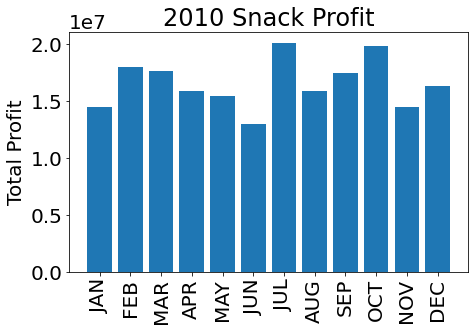

In [833]:
months = ['JAN',  'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

figure(figsize=(7,5))
# subplot(1,2,1)
# bar(months, snack_2010.groupby([snack_2010['Order Date'].dt.month])['Units Sold'].sum())
# xticks(rotation = 90)
# ylabel('Unit Sold')
# title('2010 Snack Consumption')

# subplot(1,2,2)
bar(months, snack_2010.groupby([snack_2010['Order Date'].dt.month])['Total Profit'].sum())
xticks(rotation = 90)
ylabel('Total Profit')
title('2010 Snack Profit')

tight_layout()
show()


In [851]:
snack_2011 = data[(data['Item Type'] =='Snacks')].sort_values(by=['Order Date'])

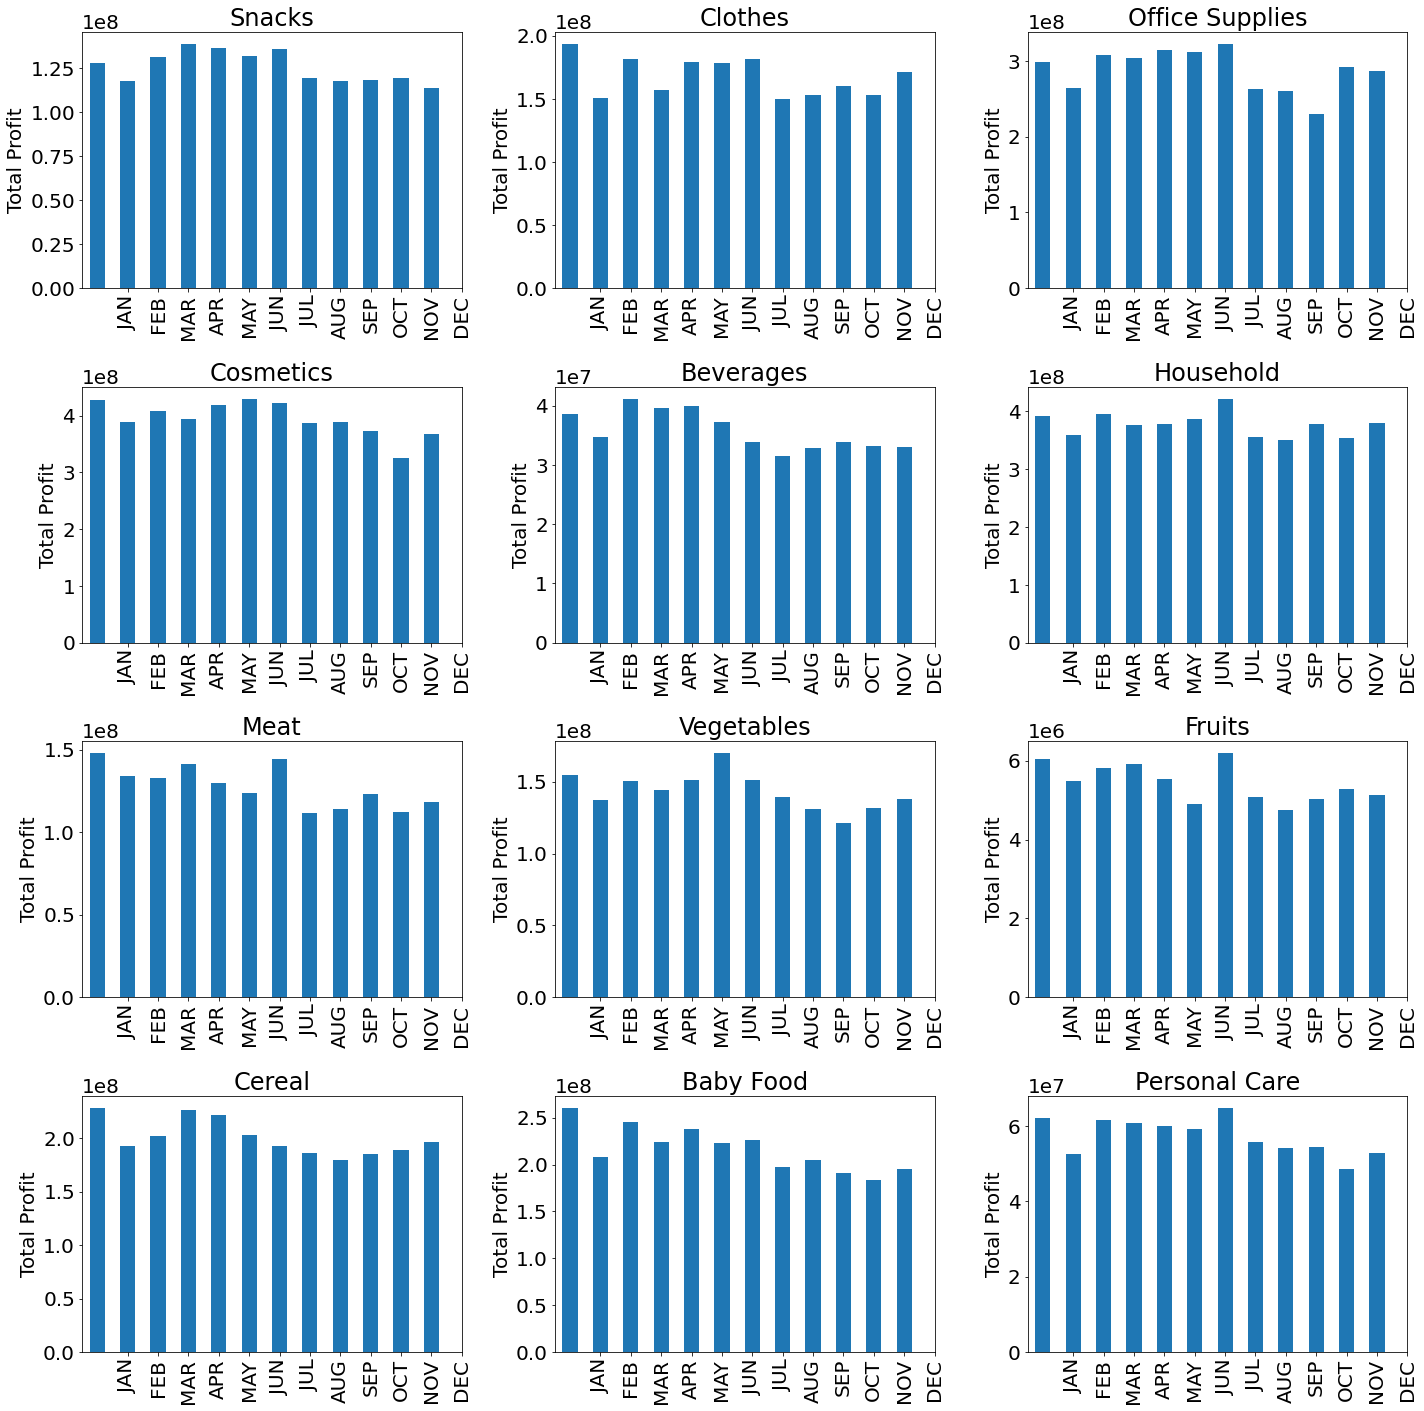

In [879]:
k = 0
figure(figsize=(20,20))
for item in items:
    subplot(4,3, k+1)
    idx = data['Item Type'] == item
    data[idx].groupby([data['Order Date'].dt.month])['Total Profit'].sum().plot(kind = 'bar')
    k += 1
    xticks(np.arange(1, 13), months, rotation = 90)
    ylabel('Total Profit')
    title(item)
    xlabel('')
tight_layout()
show()